In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**SIMPLE LINEAR REGRESSION MODELS**

**Predicting MBA Salary from Grade in 10th Marks**

From file name: MBA Salary.csv, develop an SLR model to understand and predict salary based on the percentage of marks in Grade 10.

In [22]:
np.set_printoptions(precision=4, linewidth=100)

First we import the dataset into the DataFrame

In [23]:
mba_salary = pd.read_csv('MBA Salary.csv')
mba_salary.head()

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [24]:
mba_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


**Creating Feature Set(X) and Outcome Variable(Y)** :-
   The Percentage in Grade 10 will be X and Salary will be Y. To estimate regression coefficient $\beta_0$, a constant term of 1 needs to be added as a separate column.
 


In [25]:
X = sm.add_constant(mba_salary['Percentage in Grade 10'])
Y = mba_salary['Salary']
Y.head()

0    270000
1    200000
2    240000
3    250000
4    180000
Name: Salary, dtype: int64

**Splitting the Dataset into Training and Validation Sets** :-
We use the train_test_split() function from sklearn.model_selection module to split the dataset randomly into training and validation datasets. The parameter train_size takes a fraction between 0 and 1 for specifying training set size. The remaining samples in the original set will be test or validation set. The method takes a seed value in paramenter named random_state, to fix which samples go to training and which ones go to test set.

In [26]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, random_state=100)

**Fitting the Model** :- We will fit the model using OLS method

In [27]:
mba_salary_lm = sm.OLS(train_Y, train_X).fit()

**Printing Estimated Parameters and Interpreting Them**

In [28]:
print(mba_salary_lm.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


The estimated(predicted) model can be written as :
MBA Salary = 30587.285 + 3560.587 * (Percentage in Grade 10)

**MODEL DIAGNOSTICS**

In [29]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2025-06-03 11:36      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8088 176079.3801
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

From the summary output shown above, we can infer the folowing :-
1. The model R-squared value is 0.211, that is, the model explains 21.1% of the variation in salary.
2. The p-value for the t-test is 0.0029 which indicates that there is a statistaclly significant relationship (at significance value $\alpha$ = 0.05) between the feature, percentage in grade 10, and salary. Als the probability value of F-statistic of the model is 0.0029 which indicates that the overall model is statistically significant.

**RESIDUAL ANALYSIS** : 

It is performed to check the following :
1. The residuals are normally distributed.
2. Variance of residual is constant (homoscedasticity).
3. The functional form of regression is correctly specified.
4. There are no outliers.

**1.Checking for Normal Distribution of Residual**

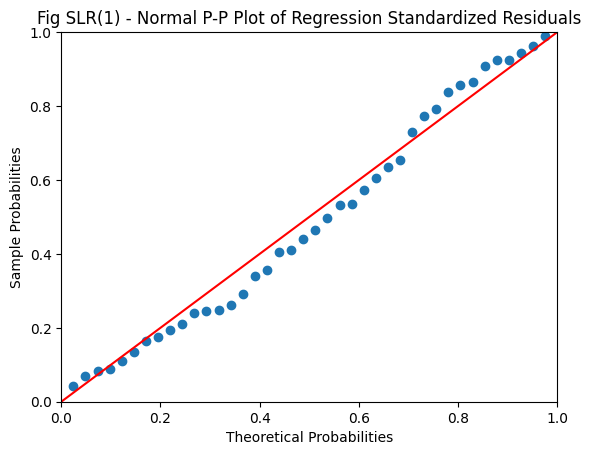

In [32]:
# We also need to standardize the residuals
standardized_resid = StandardScaler().fit_transform(mba_salary_lm.resid.values.reshape(-1, 1)).flatten()

probplot = sm.ProbPlot(standardized_resid)
probplot.ppplot(line='45')
plt.title("Fig SLR(1) - Normal P-P Plot of Regression Standardized Residuals")
plt.show()

Since the dots are close to the diagonal line, we can conclude the residuals follow an approximate normal distribution.

**2. Test of Homoscedasticity**

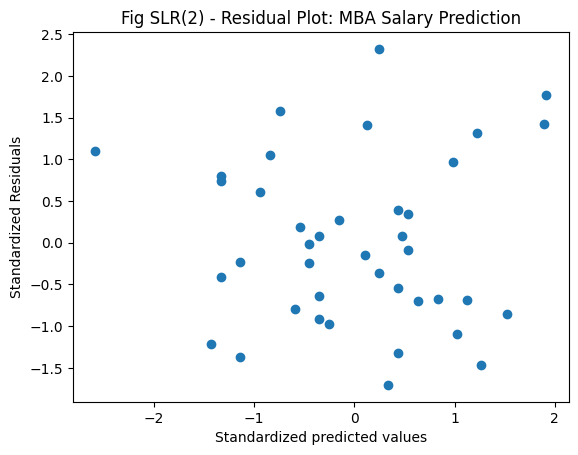

In [34]:
def get_standardized_values(vals):
    return (vals - vals.mean()) / vals.std()


plt.scatter(get_standardized_values(mba_salary_lm.fittedvalues), get_standardized_values(mba_salary_resid))
plt.title("Fig SLR(2) - Residual Plot: MBA Salary Prediction")
plt.xlabel("Standardized predicted values")
plt.ylabel("Standardized Residuals")
plt.show()

From the scatter plot, it is observed that the residuals are random and have no funnel shape, which means the residuals have constant variance(homeoscedasticity).

**Outlier Analysis**

1. Z-Score

In [36]:
mba_salary['z_score_salary'] = stats.zscore(mba_salary.Salary)
mba_salary[(mba_salary.z_score_salary > 3.0) | (mba_salary.z_score_salary < -3.0)]

,S. No.,Percentage in Grade 10,Salary,z_score_salary


We see that there are no observations that are outliers as per the Z-score

2. Cook's Distance

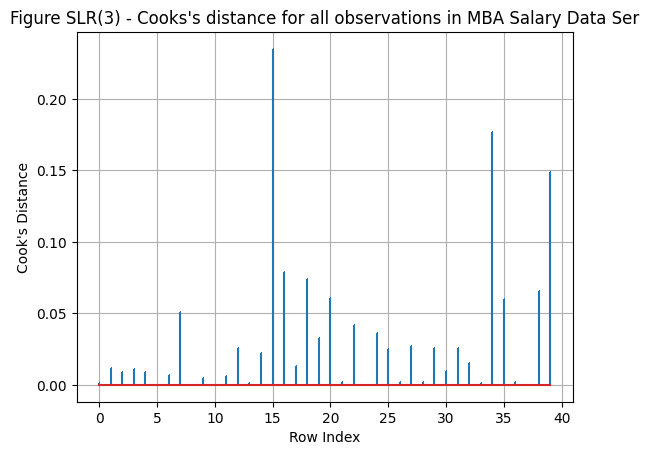

In [39]:
mba_influence = mba_salary_lm.get_influence()
(c, p) = mba_influence.cooks_distance

plt.stem(np.arange(len(train_X)), np.round(c, 3), markerfmt=",")
plt.title("Figure SLR(3) - Cooks's distance for all observations in MBA Salary Data Ser")
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.grid()
plt.show()

From the above figure, it can be observed that none of the observations' Cook's distance exceed 1 and hence none of them are outliers

3. Leverage Values

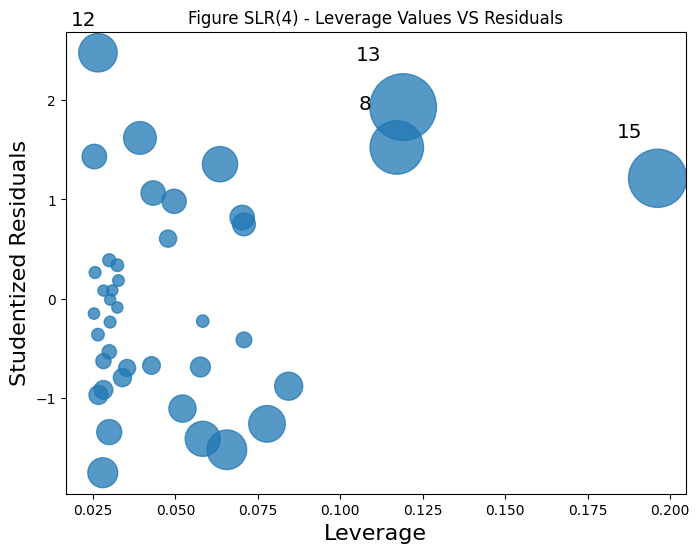

In [40]:
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots(figsize=(8, 6))
influence_plot(mba_salary_lm, ax=ax)
plt.title("Figure SLR(4) - Leverage Values VS Residuals")
plt.show()

In the above figure, the size of the circle is proportional to the product of residual and leverage value. The larger the circle, the larger is the residual and hence influence of the observation.

**Making Prediction and Measuring Accuracy** 

Ideally, the prediction should be made on the validation (or test) data and the accuracy of prediction should be evaluated.

1. Predicting using the Validation Set

In [45]:
pred_Y = mba_salary_lm.predict(test_X)

2. Finding R-Squared and RMSE

In [46]:
from sklearn.metrics import r2_score, mean_squared_error

np.abs(r2_score(test_Y, pred_Y))

np.float64(0.156645849742304)

So, the model only explains 15.6% of the variance of the validation set

In [47]:
np.sqrt(mean_squared_error(test_Y, pred_Y))

np.float64(73458.04348346895)

RMSE means the average error the model makes in predicting the outcome. The smaller the value of RMSE, the better model is.

In [49]:
mean_salary = mba_salary['Salary'].mean()
rmse = 73458.04348346895
relative_error = rmse / mean_salary
print(f"Relative Error: {relative_error:.2%}")


Relative Error: 28.45%


3. Calculating Prediction Intervals

In [56]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Predict Y
pred_Y = mba_salary_lm.predict(test_X)

# Get prediction standard errors and intervals
prstd, pred_y_low, pred_y_high = wls_prediction_std(mba_salary_lm, exog=test_X, alpha=0.1)

# Create DataFrame
pred_y_df = pd.DataFrame({
    'grade_10_perc': test_X['Percentage in Grade 10'],
    'pred_Y': pred_Y,
    'pred_y_left': pred_y_low,
    'pred_y_right': pred_y_high
})
pred_y_df

,grade_10_perc,pred_Y,pred_y_left,pred_y_right
6,70.0,279828.402452,158379.831862,401276.973042
36,68.0,272707.227686,151576.714839,393837.740534
37,52.0,215737.829560,92950.942211,338524.716909
28,58.0,237101.353858,115806.869437,358395.838278
43,74.5,295851.045675,173266.083158,418436.008191
49,60.8,247070.998530,126117.560802,368024.436257
5,55.0,226419.591709,104507.444206,348331.739212
33,78.0,308313.101515,184450.060303,432176.142727
20,63.0,254904.290772,134057.999077,375750.582466
42,74.4,295494.986937,172941.528507,418048.445366


In [ ]:
# Accuracy of the Model using  Mean Absolute Percentage Error (MAPE)
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test_Y, pred_Y)
print(f"MAPE: {mape * 100:.2f}%")

**EXERCISE**